<a href="https://colab.research.google.com/github/Sabarinathan-369/Wikitable-scrapping-using-request-and-BeautifulSoup/blob/main/Wikitable_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
url='https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
Response=requests.get(url)
if Response.status_code==200:
  print('successfully connected')
else:
  print("connection failed")

successfully connected


In [3]:
soup=BeautifulSoup(Response.text,'html.parser')
table=soup.find('table',{'class':'wikitable sortable'})

In [4]:
headers = [header.text.strip() for header in table.find_all('th')]
rows = []
for row in table.find_all('tr'):
    cells = row.find_all(['td', 'th'])
    rows.append([cell.text.strip() for cell in cells])

In [5]:
df=pd.DataFrame(rows[1:],columns=headers)
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


**Getting other tables as well**

In [6]:
import pandas as pd

# Wikipedia URL
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"

table=pd.read_html(url)
df1=table[1]
df1.head()

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters
0,1,Cargill,Food industry,177.0,160000,"Minnetonka, Minnesota"
1,2,Koch Industries,Conglomerate,125.0,120000,"Wichita, Kansas"
2,3,Publix Super Markets,Retail,54.5,250000,"Lakeland, Florida"
3,4,"Mars, Incorporated",Food industry,47.0,140000,"McLean, Virginia"
4,5,H-E-B,Retail,43.6,145000,"San Antonio, Texas"


In [7]:
df2=table[2]
df2.head()

,Rank,Name,Industry,Profits (USD millions)
0,1,Apple,Electronics,96995
1,2,Berkshire Hathaway,Conglomerate,96223
2,3,Alphabet,Technology,73795
3,4,Microsoft,Technology,72361
4,5,JPMorgan Chase,Financials,49552


**Data exploration and preprocessing**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.ensemble import *
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [10]:
df.describe()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,37,98,96,98,71
top,1,Walmart,Financials,"54,317",4.8%,"226,000","New York City, New York"
freq,1,1,13,2,2,2,13


In [11]:
# clean numerical column
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(float)
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '').astype(float)
df['Employees'] = df['Employees'].str.replace(',', '').astype(float)

In [12]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125.0,6.0,2100000.0,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785.0,11.9,1525000.0,"Seattle, Washington"
2,3,Apple,Electronics industry,383482.0,-2.8,161000.0,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622.0,14.6,440000.0,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7,396500.0,"Omaha, Nebraska"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float64
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    float64
 6   Headquarters            100 non-null    object 
dtypes: float64(3), object(4)
memory usage: 5.6+ KB


In [14]:
# Time to retain only the first value industry and headquarters columns
df['Industry']=df['Industry'].str.split(r'\s+and\s+|,',n=1).str[0]
df['Headquarters']=df['Headquarters'].str.split(',',n=1).str[0]
df.head()
df1=df.copy()

In [15]:
# handle categorical data
df=pd.get_dummies(df,columns=['Industry','Headquarters'],drop_first=True)
df.head()


,Rank,Name,Revenue (USD millions),Revenue growth,Employees,Industry_Agriculture cooperative,Industry_Agriculture manufacturing,Industry_Airline,Industry_Apparel,Industry_Automotive,...,Headquarters_San Francisco,Headquarters_San Jose,Headquarters_Santa Clara,Headquarters_Seattle,Headquarters_Spring,Headquarters_Springdale,Headquarters_St. Louis,Headquarters_Stamford,Headquarters_Washington,Headquarters_Woonsocket
0,1,Walmart,648125.0,6.0,2100000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Amazon,574785.0,11.9,1525000.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,3,Apple,383482.0,-2.8,161000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,UnitedHealth Group,371622.0,14.6,440000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Berkshire Hathaway,364482.0,20.7,396500.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df=df.replace({False:0,True:1})
df

<ipython-input-16-4c76706c633e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({False:0,True:1})


,Rank,Name,Revenue (USD millions),Revenue growth,Employees,Industry_Agriculture cooperative,Industry_Agriculture manufacturing,Industry_Airline,Industry_Apparel,Industry_Automotive,...,Headquarters_San Francisco,Headquarters_San Jose,Headquarters_Santa Clara,Headquarters_Seattle,Headquarters_Spring,Headquarters_Springdale,Headquarters_St. Louis,Headquarters_Stamford,Headquarters_Washington,Headquarters_Woonsocket
0,1,Walmart,648125.0,6.0,2100000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Amazon,574785.0,11.9,1525000.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,Apple,383482.0,-2.8,161000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,UnitedHealth Group,371622.0,14.6,440000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Berkshire Hathaway,364482.0,20.7,396500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,TIAA,45735.0,11.8,16023.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,97,CHS,45590.0,-4.6,10609.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,98,Bristol-Myers Squibb,45006.0,-2.5,34100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,99,Dow Chemical Company,44622.0,-21.6,35900.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Revenue Growth Prediction**

In [20]:
x=df.drop(['Rank','Name','Revenue (USD millions)'],axis=1)
y=df['Revenue (USD millions)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

#feature importance
importance=pd.Series(model.coef_,index=x.columns)
importance.sort_values(ascending=False).head()

,0
Headquarters_Spring,192019.696771
Headquarters_Mountain View,185213.895130
Industry_Health,166846.632748
Industry_Electronics industry,158504.306684
Headquarters_Cupertino,158504.306682


In [21]:
y_pred = model.predict(x_test)

print(f"R²: {model.score(x_test, y_test):.2f}")

R²: 0.50


**Residual analysis**

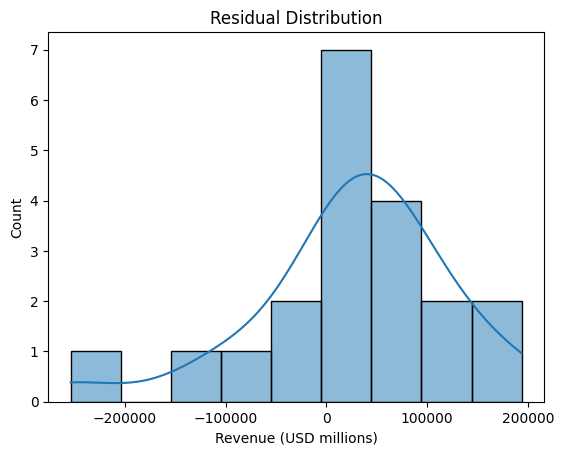

In [22]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()